In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import svm
import pickle

Using TensorFlow backend.


In [2]:
# load pickled dictionary with
# key: isotope
# value: trained model
dep_dict = pickle.load(open('dep.pkl',"rb"))

In [10]:
# given enrichment and burnup value,
# predict UNF composition

depleted_composition = {}
enr_br = np.array([[3, 40000]])
for iso, model in dep_dict.items():
    depleted_composition[iso] = model.predict(enr_br)[0]

depleted_composition


1.0002094516997702


{'zr-95': 1.3763760317857658e-06,
 'zr-93': 0.0009480419653022391,
 'ra-226': 6.284350366624123e-14,
 'ru-103': 7.813449403922842e-08,
 'ru-106': 9.56218240454948e-05,
 'sb-124': 1.0512181261403607e-09,
 'sb-125': 1.07251106069892e-05,
 'pu-238': 0.0003089622874404416,
 'pu-239': 0.007543298406280426,
 'np-237': 0.0005995504182691911,
 'nb-95': 1.6233682924660572e-06,
 'pa-231': 6.219506520151069e-10,
 'pd-107': 0.00032356034592425086,
 'pm-147': 0.00015425122010328344,
 'pu-240': 0.0028870634738575353,
 'pu-241': 0.0019627029752729043,
 'pu-244': 7.291683098935056e-08,
 'pu-242': 0.0007659580077897907,
 'i-129': 0.0002053900634005136,
 'h-3': 6.652652341942352e-08,
 'kr-85': 2.9475650212489216e-05,
 'nb-94': 1.996466828318788e-09,
 'cm-248': 9.186049651566777e-10,
 'cs-134': 0.00012743865811420003,
 'cs-135': 0.0005767940466238297,
 'cm-245': 6.824492936023956e-06,
 'cm-244': 9.532563589498704e-05,
 'cm-246': 6.855094460834948e-07,
 'cm-247': 1.0763252586644479e-08,
 'eu-152': 2.02848

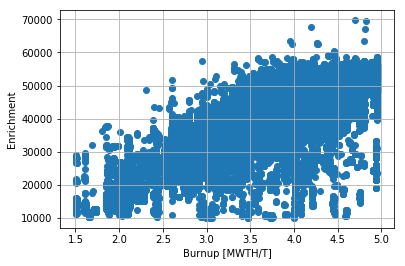

In [3]:
all_dat = pd.read_csv('./curated.csv', index_col=0)

# sift out pwrs
all_dat = all_dat.loc[all_dat['reactor_type'] == 'PWR']  
all_dat = all_dat.loc[(all_dat['init_enr'] > 1.5) & (all_dat['bu'] > 10000)]
plt.scatter(all_dat['init_enr'], all_dat['bu'])
plt.xlabel('Burnup [MWTH/T]')
plt.ylabel('Enrichment')
plt.grid()
plt.show()


In [4]:
#### Add total mass for each row

# get enrichment and burnup
enr_bu = all_dat[['init_enr', 'bu']].as_matrix()
# get total mass and multiply by it at the last line

mass_dict = {}

for iso in dep_dict.keys():
    mass_dict[iso] = 0

# apply algorithm to dataset
for iso, model in dep_dict.items():
    for row in enr_bu:
        mass_dict[iso] += model.predict(row)[0]


[[  3.80229998e+00   4.19191010e+04]
 [  3.80060000e+00   3.80004000e+04]
 [  3.80080009e+00   4.32718980e+04]
 ..., 
 [  3.33000000e+00   4.70030000e+04]
 [  3.33000000e+00   4.68700000e+04]
 [  2.11600000e+00   1.73630000e+04]]


/home/teddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
